In [1]:
from pycalphad import Database, equilibrium, calculate, binplot
import pycalphad.variables as v
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import numpy as np
% matplotlib inline

In [2]:
db_path = 'databases/lab3/AlMg-13Tok.tdb' # Al-Mg

In [3]:
db = Database(db_path)

In [4]:
elements = db.elements
elements

{'AL', 'MG', 'VA'}

In [5]:
db_phases = list(db.phases.keys())
db_phases

['LIQUID',
 'FCC_A1',
 'BCC_A2',
 'HCP_A3',
 'ALMG_BETA',
 'ALMG_EPS',
 'AL12MG17_A12']

### 1. При помощи binplot pycalphad построить двойную диаграмму состояния. 
        На выбор: Al-Si, Al-Zn, Ag-Cu, Al-Mg, Ag-Ge

Выбраны Al-Mg

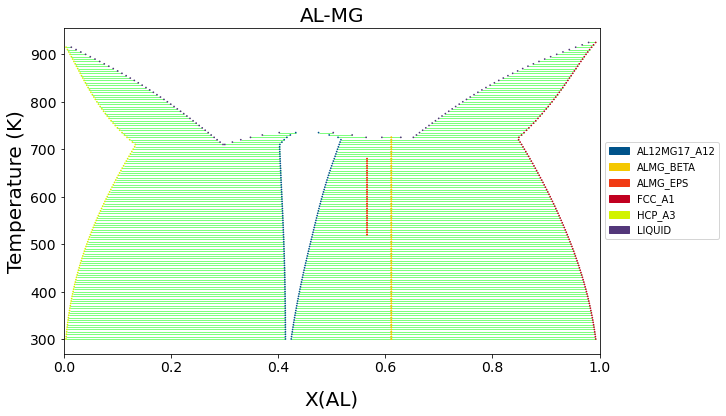

In [6]:
fig = plt.figure(figsize=(12, 6))
axes = fig.gca()
binplot(db, elements, db_phases, {v.X('AL'):(0, 1, 0.01), 
                                  v.T: (300, 2000, 5), 
                                  v.P: 101325, 
                                  v.N: 1},
        plot_kwargs={'ax': axes}
       )
plt.show()

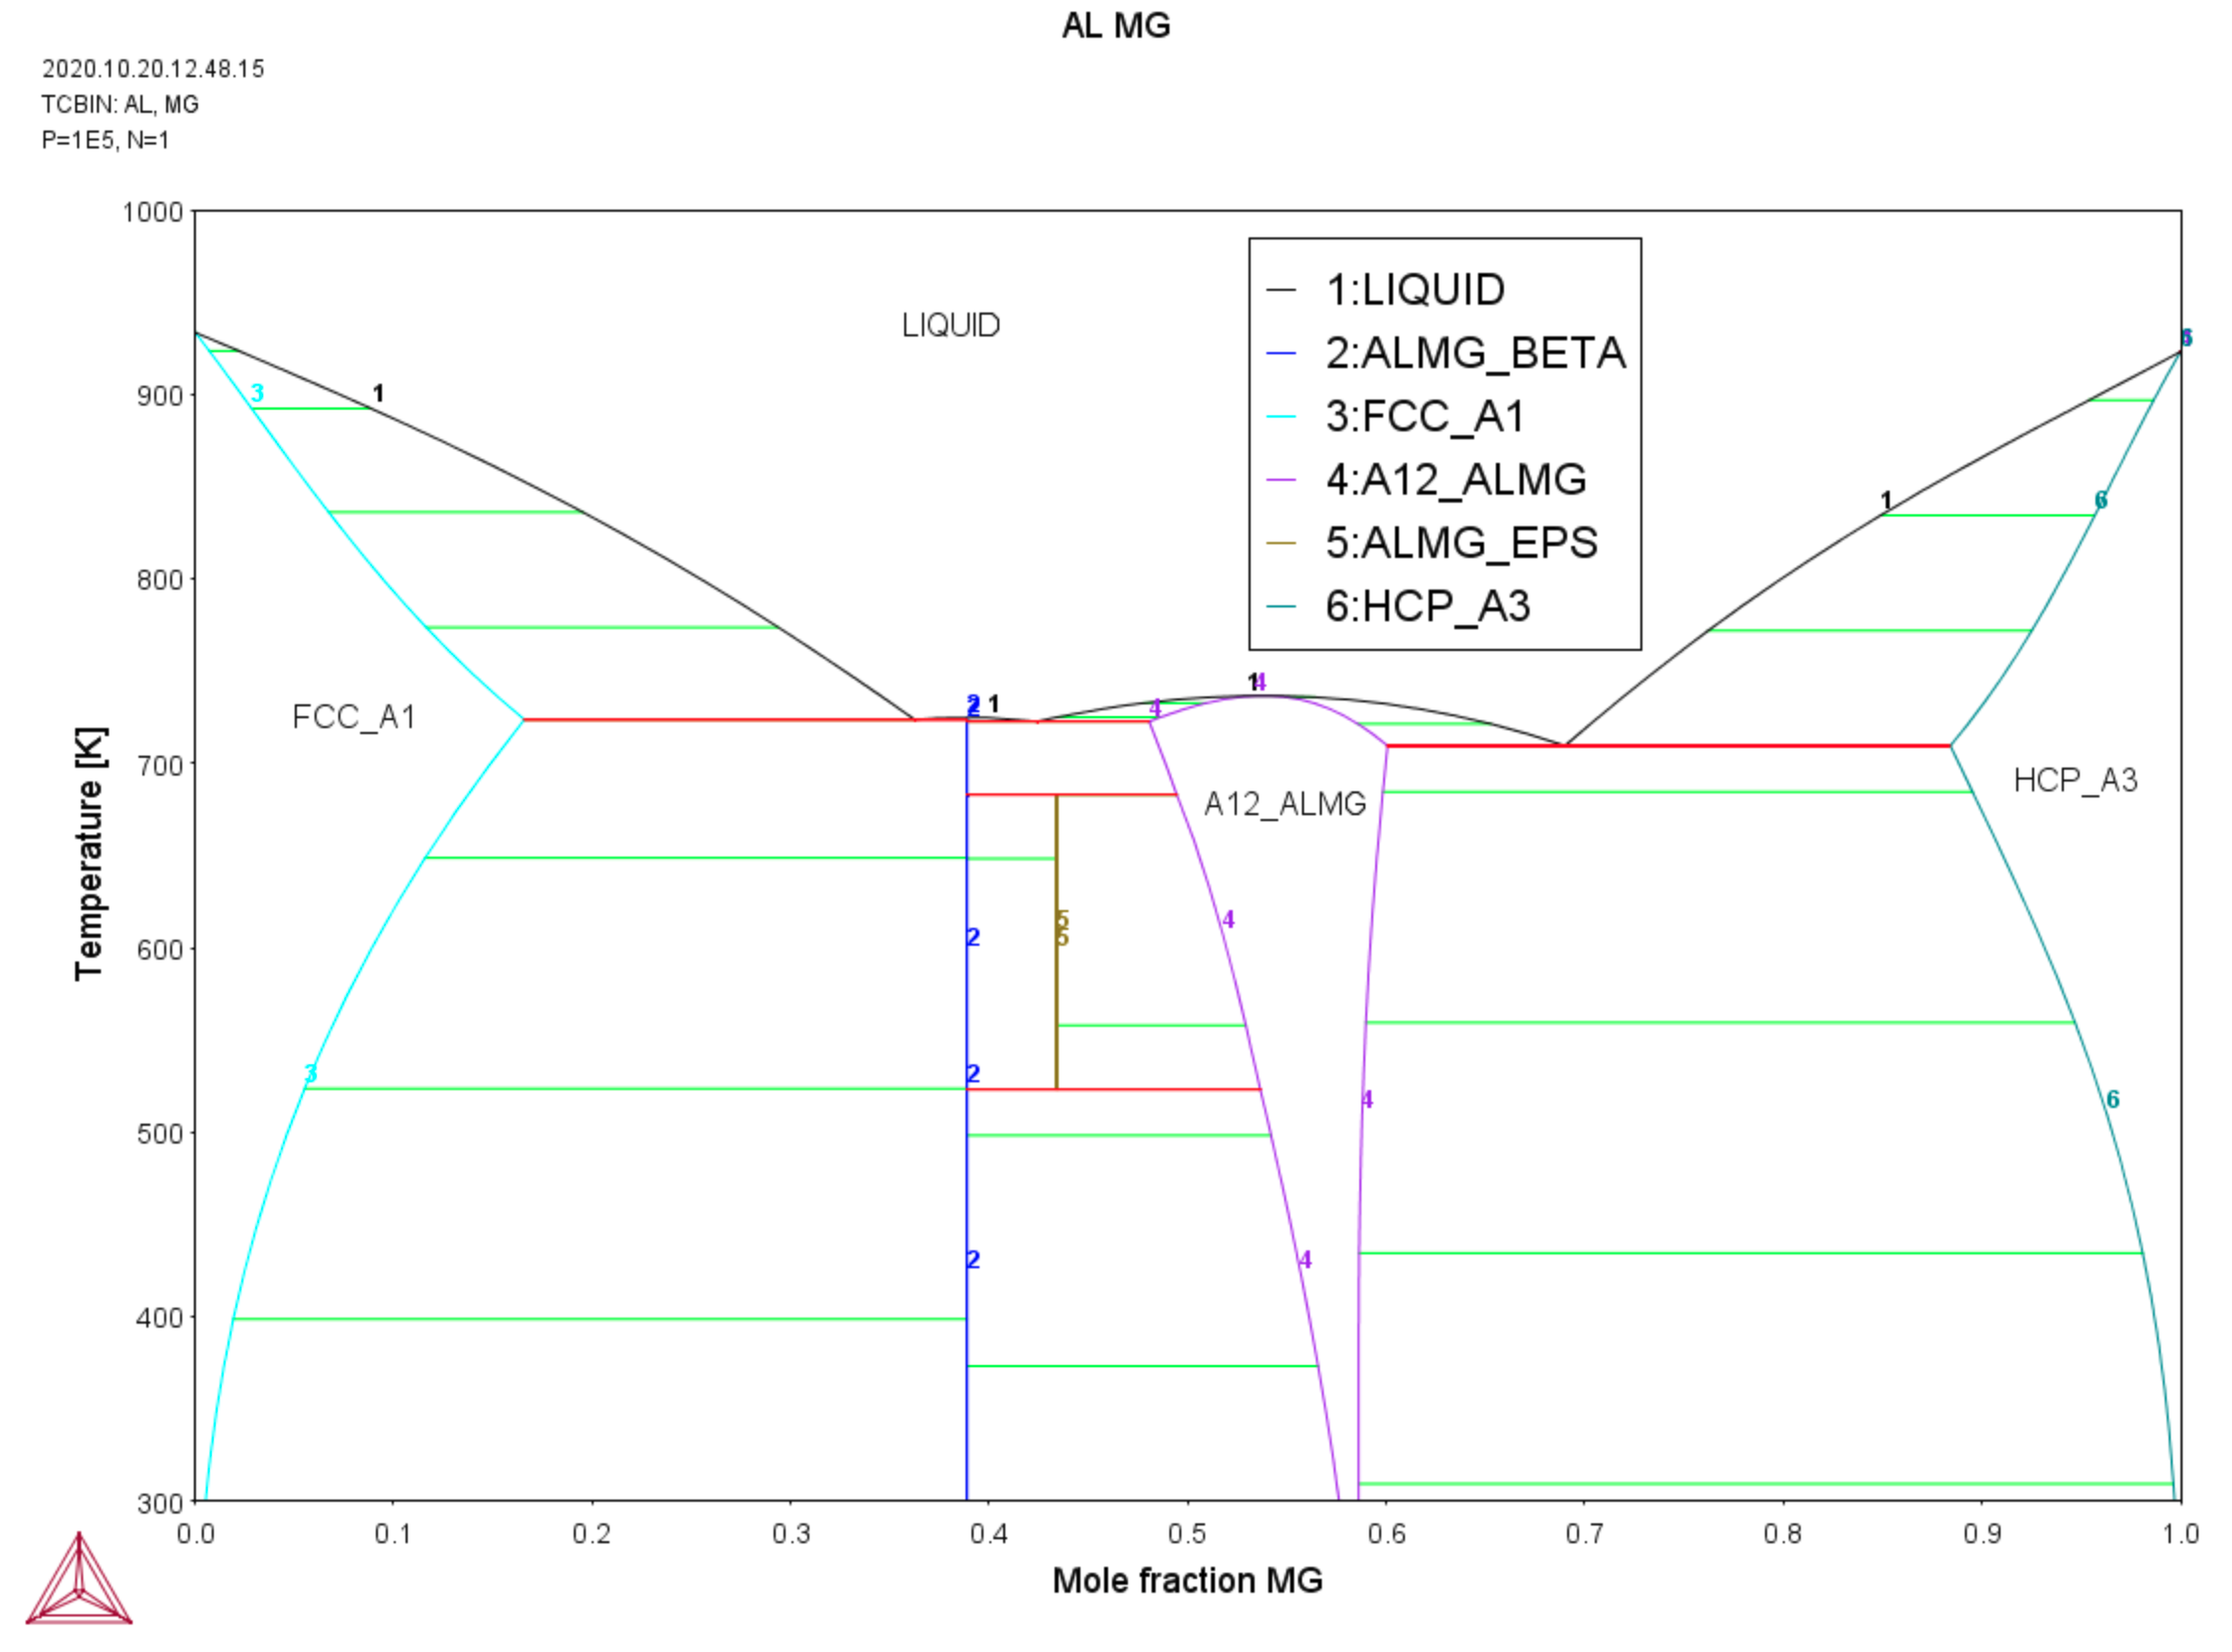

### 2. Построить «диаграмму свойств» (зависимость фазового состава от температуры) для трех составов:
1. вблизи точки эвтектического равновесия
2. в области существования только твердых растворов-при максимальной растворимости одного из компонентов в другом
3. где-то между первыми двумя точками

In [28]:
# выбрать для 1 v.X('al') [20, 60]
# eq_high = equilibrium(db, elements, db_phases, {v.X('MG'): 0.35, 
#                                         v.T: (680, 780, 2), 
#                                         v.P: 101325, 
#                                         v.N: 1})

eq_medium = equilibrium(db, elements, db_phases, {v.X('MG'): 0.2, 
                                        v.T: (500, 1000, 2), 
                                        v.P: 101325, 
                                        v.N: 1})

# eq_low = equilibrium(db, elements, db_phases, {v.X('MG'): 0.15, 
#                                         v.T: (680, 780, 2), 
#                                         v.P: 101325, 
#                                         v.N: 1})

In [8]:
def plot_phase_frac(phases, eq, temp_range, title=''):
    plt.figure(figsize=(12, 6))
    for index, phase in enumerate(phases):
        phase_indices = (eq.Phase.values == phase).nonzero()
        plt.plot(eq['T'].values[phase_indices[2]], 
                 eq.NP.values[eq.Phase.values == phase],
                 label=phase)
    
    plt.ylabel('Доля фаз')
    plt.xlabel('Температура (K)')
    plt.xticks(temp_range)
    plt.title(title)
    plt.legend()
    plt.show()

In [9]:
eq_high_phases = [phase for phase in np.unique(eq_high.Phase.values) if phase != '']

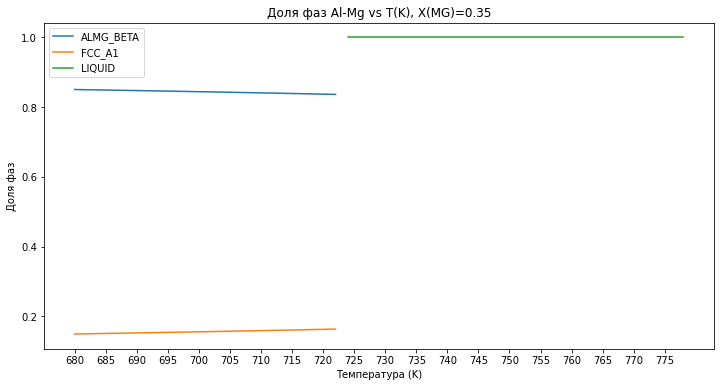

In [10]:
plot_phase_frac(eq_high_phases, eq_high, range(680, 780, 5), title='Доля фаз Al-Mg vs T(K), X(MG)=0.35')

In [11]:
eq_medium_phases = [phase for phase in np.unique(eq_medium.Phase.values) if phase != '']

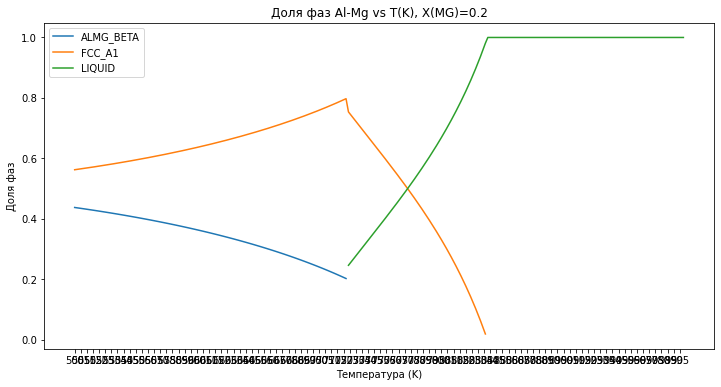

In [29]:
plot_phase_frac(eq_medium_phases, eq_medium, range(500, 1000, 5), title='Доля фаз Al-Mg vs T(K), X(MG)=0.2')

In [13]:
eq_low_phases = [phase for phase in np.unique(eq_low.Phase.values) if phase != '']

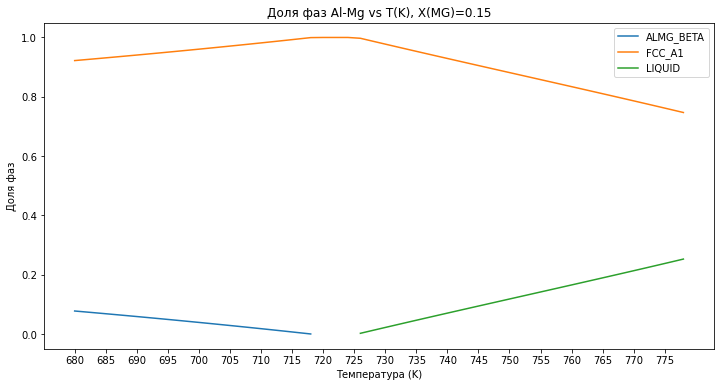

In [14]:
plot_phase_frac(eq_low_phases, eq_low, range(680, 780, 5), title='Доля фаз Al-Mg vs T(K), X(MG)=0.15')

### Часть 2
- Рассчитать и построить молярную энергию Гиббса в системе Ag-Sn при (T=1250 K, p=101325 Pa, n=1 моль) в зависимости от x(Sn), используя приложенную базу данных
- Проверить идеальность раствора

In [15]:
db_AgSn = Database('databases/lab3/AgSn_pbin.TDB')

In [16]:
db2_elements = db_AgSn.elements
db2_elements

{'AG', 'SN', 'VA'}

In [17]:
db2_phases = list(db_AgSn.phases.keys())
db2_phases

['LIQUID', 'BCT_A5', 'DIAMOND_A4', 'FCC_A1']

In [18]:
# добавить output='GM_MIX'
eq2 = equilibrium(db_AgSn, db2_elements, db2_phases, {v.X('SN'): (0, 1, 0.02),
                                                      v.P: 101325,
                                                      v.T: 1250,
                                                      v.N: 1}, output='GM_MIX')

In [19]:
eq2_phases = [phase for phase in np.unique(eq2.Phase.values) if phase != '']
eq2_phases

['LIQUID']

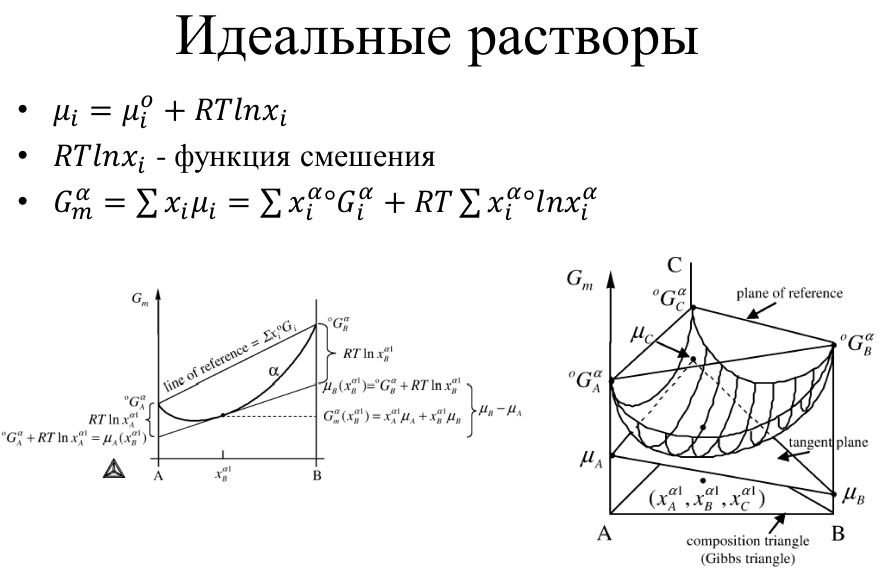

In [20]:
R = 8.314462 # Дж/(моль∙К)
x = eq2.X_SN.values.squeeze()
GM = eq2.GM.values.squeeze()

# T = 1250
G_ideal = R*1250*(x*np.log(x) + (1-x)*np.log(1-x))
G_ex = eq2.GM_MIX.values.squeeze() - G_ideal

print(G_ideal.shape)
print(G_ex.shape)

(50,)
(50,)


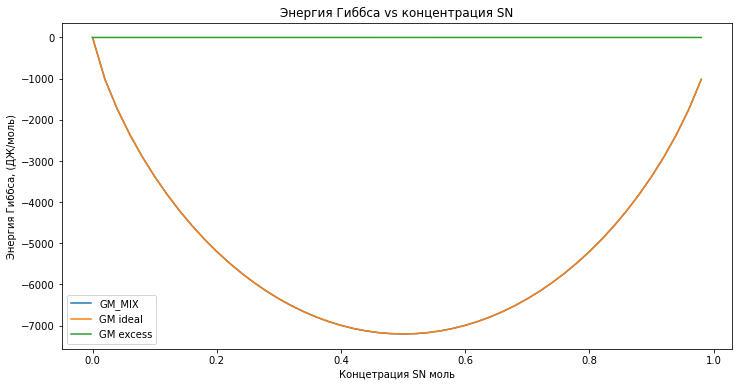

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(eq2.X_SN.values.squeeze(), eq2.GM_MIX.values.squeeze(), label='GM_MIX')
plt.plot(eq2.X_SN.values.squeeze(), G_ideal, label='GM ideal')
plt.plot(eq2.X_SN.values.squeeze(), G_ex, label='GM excess')
# plt.plot(eq2.X_SN.values.squeeze(), GM, label='GM total')

plt.xlabel('Концетрация SN моль')
plt.ylabel('Энергия Гиббса, (ДЖ/моль)')
plt.title('Энергия Гиббса vs концентрация SN')
plt.legend()
plt.show()

## 3
- Рассчитать и построить молярную энергию Гиббса в системе Fe-Si при
(T=1823 K, p=101325 Pa, n=1 моль) в зависимости от x(Si), используя
приложенную базу данных

- Проверить идеальность раствора

- Получить на одном графике все вклады в свободную энергию
раствора

In [22]:
db_FeSi = Database('databases/lab3/FeSi-17Cui.tdb')

In [23]:
db3_phases = list(db_FeSi.phases.keys())
db3_phases

['LIQUID',
 'FCC_A1',
 'BCC_A2',
 'A2_BCC',
 'B2_BCC',
 'BCC_4SL',
 'HCP_A3',
 'DIAMOND_A4',
 'FE2SI',
 'M5SI3_D88',
 'MSI_B20',
 'FESI2_L',
 'FESI2_H']

In [24]:
db3_elements = list(db_FeSi.elements)
db3_elements

['VA', 'SI', 'FE']

In [25]:
# выбрать фазу Liquid
eq3 = equilibrium(db_FeSi, db3_elements, ['LIQUID'], {v.X('SI'): (0, 1, 0.02),
                                                      v.P: 101325,
                                                      v.T: 1823,
                                                      v.N: 1}, output='GM_MIX')

In [26]:
x_si = eq3.X_SI.values

G_ideal3 = R*1823*(x_si*np.log(x_si) + (1-x_si)*np.log(1-x_si))
G_ex3 = eq3.GM_MIX.values.squeeze() - G_ideal3

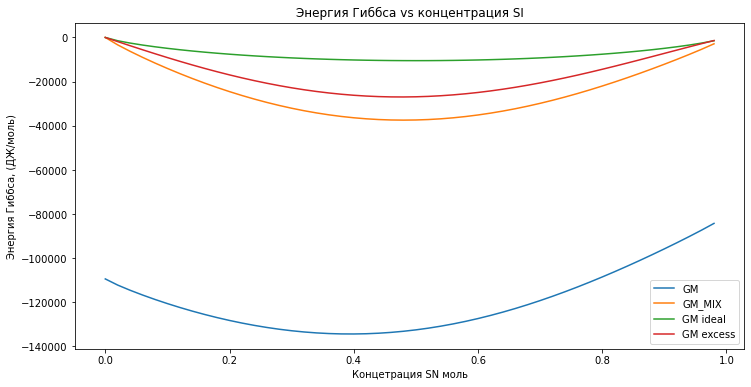

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(x_si, eq3.GM.values.squeeze(), label='GM')
plt.plot(x_si, eq3.GM_MIX.values.squeeze(), label='GM_MIX')
plt.plot(x_si, G_ideal3, label='GM ideal')
plt.plot(x_si, G_ex3, label='GM excess')

plt.xlabel('Концетрация SI моль')
plt.ylabel('Энергия Гиббса, (ДЖ/моль)')
plt.title('Энергия Гиббса vs концентрация SI')
plt.legend()
plt.show()